In [ ]:
# 📌 Step 1: Install required libraries
!pip install PyPDF2 pandas matplotlib seaborn wordcloud

# 📌 Step 2: Import modules
import PyPDF2
import pandas as pd
import io
import re
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import defaultdict3

# 📌 Step 3: Upload PDF files
print("📂 Upload syllabus PDF files:")
uploaded = files.upload()

# 📌 Step 4: Define course name master list (paste your list below)
course_master_text = """
Mathematical Foundations of Computer Science, OOPS Using C++ & Java, Database Management System, Operating System,
Technical Communication, Practical Lab based on MSC-102, Practical Lab based on MSC-103, Advanced Java Programming,
Computer Organisation, Data Structures, Data Communication & Networks, Web Technologies,
Practical Lab based on MSC-201 & MSC-203, Practical Lab based on MSC-205, Optimization Techniques,
Interactive Computer Graphics, Linux Administration, Data Mining & Warehousing, Software Engineering,
Practical Lab based on MSC-302, Practical Lab based on MSC-303, Design & Analysis of Algorithm,
Artificial Intelligence, Enterprise Resource Planning, Major Project, Seminar,
Applied Signal and Image Processing, Applied Signal and Image Processing Practical, Software Defined Networking,
Software Defined Networking Practical, Principles of Compiler Design, NoSQL Technologies, NoSQL Technologies Practical,
Robotics, Robotics Practical, UI/UX Design, UI/UX Design Practical, Research Methodology, Machine Learning,
Machine Learning Practical, Natural Language Processing, Natural Language Processing Practical, Simulation and Modelling,
Bioinformatics, Bioinformatics Practical, Embedded and IoT Technology, Embedded and IoT Technology Practical,
Web Data Analytics, Web Data Analytics Practical, Design & Analysis of Algorithms, Information Security,
Database Systems & Implementation, Computational Intelligence, Compiler Design, Advanced Operating Systems,
Data Mining, Advanced Computer Networks, Electronic Commerce, Numerical Computing, Combinatorial Optimization,
Computational Linguistics, Digital Image Processing & Multimedia, Neural Networks,
Software Quality Assurance & Testing, Machine Learning, Embedded Systems, Cryptography, Distributed Computing,
Modeling and Simulation, Special Topics in Computer Networks, Special Topics in Data Mining,
Special Topics in Theoretical Computer Science, Special Topics in Information Security,
Special Topics in Soft Computing, Special Topics in Database System, Special Topics in Artificial Intelligence,
Special Topics in Computational Intelligence, Minor Project, Major Project, Web3 Technologies,
Web3 Technologies Practical, Cyber Security and Risk Assessment, Cyber Security and Risk Assessment Practical,
Ethical & Responsible AI, Social Network Analysis, Social Network Analysis Practical, Data Visualization,
Data Visualization Practical, Fuzzy Systems, Fuzzy Systems Practical, Deep Learning, Deep Learning Practical,
Big Data Analytics, Big Data Analytics Practical, Research Project, Advanced Computer Architecture, Data Structure,
Data Communication, Data Structure Laboratory, Database Laboratory, Computer Network,
Computer Graphics and Image Processing, Graphics Laboratory, Software Engineering Laboratory,
Analysis & Design of Algorithms, Object Oriented Analysis and Design, Python Programming,
Advanced Software Engineering, Embedded Systems, Algorithm Lab, Python Programming Lab,
Data Mining and Data Warehousing, Principles of Compiler Design, Blockchain Technologies,
Advanced Java Programming Lab, Web Technology Lab, Digital Image Processing, Cloud Computing,
Data Science & Analytics, Digital Image Processing using MATLAB Lab, Network Security and Cryptography,
Advanced Internet of Things, Data Mining using R Lab, Internship/Industrial Activity, Distributed Operating System,
Artificial Neural Networks, Project with Viva-Voce, Parallel Processing, Robotics, Language Structure,
System Software, Computer Networks, Advanced Programming Language, Computer Organization and Architecture,
Data Structures using C, Microprocessor and Applications, Visual and Dot (NET) Programming, C++ Programming Laboratory,
Operating System Laboratory, Advanced Computer Applications, Computer Graphics, Data Networking,
Java Programming, System Analysis and Design, Java Laboratory, Mini Project, Project Work, Data Management,
Computer Theory, Computer Science Theory, Data Logic, Computer Architecture, Calculus, Web Services,
Mobile Computing, Distribution Computing, Information Security, Soft Computing, Statistics and Data Analytics,
Data Compression, Programming Languages, Discrete Mathematics, Distributed Systems, Basic Programming Laboratory,
Mathematical Logic, Computer Systems Verification, Complexity Theory, Operations Research,
Data Mining and Machine Learning, Cryptography and Computer Security, Software Engineering,
Artificial Intelligence, Web Computing, Application Development, Enterprise System Design, Database Systems,
Cloud Computing, Discrete Mathematics, Data Structures and Algorithms, Introduction to Programming using Python,
Theory of Computation, Object Oriented Programming using Java, Cryptography and Network Security,
Web Technology, Mini Project, Major Project, Computational Intelligence, Business Data Analytics,
Digital Image Processing, Data Warehousing and Data Mining, Pattern Recognition, Natural Language Processing,
Principles of Deep Learning, Deep Learning in Computer Vision, Artificial Emotional Intelligence,
Data Visualization, Statistics for Data Science, Digital Watermarking and Steganography,
Human Computer Interaction, Parallel and Distributed Computing, Software Testing, Agile Process and DevOps,
Software Project Management, Design Patterns, Wireless Sensor Networks, Blockchain Technology,
Cloud Computing, Web Services, Ethical Hacking, Internet of Things, Internet of Things for Health Care,
Text Analytics, Social Media Analytics, Approximation Algorithms, Parallel Algorithms,
Mobile App Development, Formal Methods and Verification, Functional Programming,
Object Oriented Programming using C++, Python Programming for Data Analytics, R Programming, C Programming,
Orientation on Research for PG Students, LaTeX for Researchers, Cyber Security, Computer Architecture,
Digital Electronics, Programming using C, Numerical Methods, Object Oriented Programming with C++,
Visual Basic.net, Data Structure using C/C++, Statistical Method & Applications,
Object Oriented Programming with JAVA, Techniques of Operation Research, E-commerce & ERP,
Review Literature/Assignment/Tour
"""

# Convert master list to set
course_list = [c.strip() for c in course_master_text.split(',') if c.strip()]
course_set = set(course_list)

# 📌 Step 5: Extract course frequencies
def count_courses_from_pdfs(uploaded_files, course_set):
    course_occurrence = {course: 0 for course in course_set}
    total_files = len(uploaded_files)

    for filename, file in uploaded_files.items():
        reader = PyPDF2.PdfReader(io.BytesIO(file))
        content = ''
        for page in reader.pages:
            page_text = page.extract_text()
            if page_text:
                content += ' ' + page_text.lower()

        for course in course_set:
            if course.lower() in content:
                course_occurrence[course] += 1

    # Create result dataframe
    df_result = pd.DataFrame([
        {
            "Course": course,
            "Appears In": count,
            "Category": "Common" if count >= max(1, total_files // 2) else "Unique"
        }
        for course, count in course_occurrence.items() if count > 0
    ])

    return df_result.sort_values(by="Appears In", ascending=False).reset_index(drop=True)

# 📌 Step 6: Generate results
df_courses = count_courses_from_pdfs(uploaded, course_set)

# 📌 Step 7: Save and display results
df_courses.to_csv("final_course_match_result.csv", index=False)
print("✅ Final Course Match Results:")
print(df_courses.head(20))  # Show top 20 courses

# Download results
files.download("final_course_match_result.csv")


📂 Upload syllabus PDF files:


Saving 22-4-15 Syllabus Msc-cs Batch2013.pdf to 22-4-15 Syllabus Msc-cs Batch2013 (1).pdf
Saving BOS-MSC-REVISED_08102022.pdf to BOS-MSC-REVISED_08102022 (1).pdf
Saving Computer-SC.pdf to Computer-SC (1).pdf
Saving Int MSc CS Syllabus Oct 2022.pdf to Int MSc CS Syllabus Oct 2022 (1).pdf
Saving M.Sc. Artificial Intelligence and Data Science.pdf to M.Sc. Artificial Intelligence and Data Science (1).pdf
Saving M.Sc. Computer Science.pdf to M.Sc. Computer Science (1).pdf
Saving M.Sc_Computer_Science.pdf to M.Sc_Computer_Science (1).pdf
Saving M.ScCS-COPSOPO-Syllabus.pdf to M.ScCS-COPSOPO-Syllabus (1).pdf
Saving msc comp-sc_syl_09.pdf to msc comp-sc_syl_09 (1).pdf
Saving MSc in Computer Science (CBCS-CO-2019).pdf to MSc in Computer Science (CBCS-CO-2019) (1).pdf
Saving MSc in Computer Science Syllabus.pdf to MSc in Computer Science Syllabus (1).pdf
Saving MScCs_CURRICULUM_REG2023.pdf to MScCs_CURRICULUM_REG2023 (1).pdf
Saving syllabus_msc_computer_science_i_ii_2023-24 (1).pdf to syllabus_ms

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 📌 Use Case 1: Filter common courses (appearing in at least half of PDFs)
df_common = df_courses[df_courses['Category'] == 'Common'].sort_values(by='Appears In', ascending=False)
common_csv_path = "common_courses.csv"
df_common.to_csv(common_csv_path, index=False)
print("\n✅ Common Courses (Appearing in Multiple PDFs):")
print(df_common.head())
files.download(common_csv_path)


✅ Common Courses (Appearing in Multiple PDFs):
                    Course  Appears In Category
0           Data Structure          14   Common
1          Data Structures          12   Common
2  Artificial Intelligence          11   Common
3                 Calculus          11   Common
4              Data Mining          11   Common


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 📌 Use Case 2: Filter unique courses (appearing in only 1 PDF)
df_unique = df_courses[df_courses['Appears In'] == 1].sort_values(by='Course').reset_index(drop=True)
unique_csv_path = "unique_courses_only.csv"
df_unique.to_csv(unique_csv_path, index=False)
print("\n✅ Unique Courses (Appearing in Only 1 PDF):")
print(df_unique.head(10))
files.download(unique_csv_path)


✅ Unique Courses (Appearing in Only 1 PDF):
                            Course  Appears In Category
0   Advanced Computer Applications           1   Unique
1       Advanced Computer Networks           1   Unique
2      Advanced Internet of Things           1   Unique
3    Advanced Java Programming Lab           1   Unique
4       Advanced Operating Systems           1   Unique
5    Advanced Programming Language           1   Unique
6    Advanced Software Engineering           1   Unique
7         Agile Process and DevOps           1   Unique
8                    Algorithm Lab           1   Unique
9  Analysis & Design of Algorithms           1   Unique


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 📌 Use Case 3: Compiled Syllabi of Common Subjects
def extract_subject_content(pdf_content, subject):
    """
    Extract content related to a specific subject from PDF text
    """
    subject_content = []
    # Look for subject mentions (case insensitive)
    subject_pattern = re.compile(rf"{re.escape(subject.lower())}[^.]*\.?", re.IGNORECASE)

    # Find all matches of the subject pattern
    matches = subject_pattern.finditer(pdf_content.lower())

    for match in matches:
        # Get surrounding context (100 chars before and after)
        start = max(0, match.start() - 100)
        end = min(len(pdf_content), match.end() + 100)
        context = pdf_content[start:end]
        subject_content.append(context.strip())

    return "\n\n".join(subject_content) if subject_content else "No specific content found for this subject."

def compile_syllabi_for_common_subjects(uploaded_files, common_subjects):
    """
    Compile syllabi content for common subjects across all PDFs
    """
    compiled_syllabi = {}

    for subject in common_subjects:
        subject_syllabus = []

        for filename, file in uploaded_files.items():
            reader = PyPDF2.PdfReader(io.BytesIO(file))
            content = ''
            for page in reader.pages:
                page_text = page.extract_text()
                if page_text:
                    content += ' ' + page_text.lower()

            # Extract subject content from this PDF
            subject_content = extract_subject_content(content, subject)
            if subject_content != "No specific content found for this subject.":
                subject_syllabus.append({
                    'source': filename,
                    'content': subject_content
                })

        compiled_syllabi[subject] = subject_syllabus

    return compiled_syllabi

# Get common subjects (appearing in at least half of the PDFs)
common_subjects = df_common['Course'].tolist()

# Compile syllabi for common subjects
compiled_syllabi = compile_syllabi_for_common_subjects(uploaded, common_subjects)

# Create a DataFrame for the compiled syllabi
compiled_data = []
for subject, syllabi in compiled_syllabi.items():
    for entry in syllabi:
        compiled_data.append({
            'Subject': subject,
            'Source PDF': entry['source'],
            'Content Excerpt': entry['content'][:500] + "..." if len(entry['content']) > 500 else entry['content']
        })

df_compiled = pd.DataFrame(compiled_data)

# Save to CSV
compiled_csv_path = "compiled_syllabi_common_subjects.csv"
df_compiled.to_csv(compiled_csv_path, index=False)

print("\n✅ Compiled Syllabi for Common Subjects:")
print(df_compiled.head())

# Offer download link
files.download(compiled_csv_path)


✅ Compiled Syllabi for Common Subjects:
          Subject                                         Source PDF  \
0  Data Structure          22-4-15 Syllabus Msc-cs Batch2013 (1).pdf   
1  Data Structure                   BOS-MSC-REVISED_08102022 (1).pdf   
2  Data Structure                                Computer-SC (1).pdf   
3  Data Structure               Int MSc CS Syllabus Oct 2022 (1).pdf   
4  Data Structure  M.Sc. Artificial Intelligence and Data Science...   

                                     Content Excerpt  
0  msc -202 computer organisation   4 1  - 40 60 ...  
1  course \ncategory  course title  l t p c \ni c...  
2  ism101  advanced computer architecture  100 4 ...  
3  ter – iii \ns. no.  course \ncode  course titl...  
4  ience  4 3 1 0 \n2. mai102  introduction  to a...  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

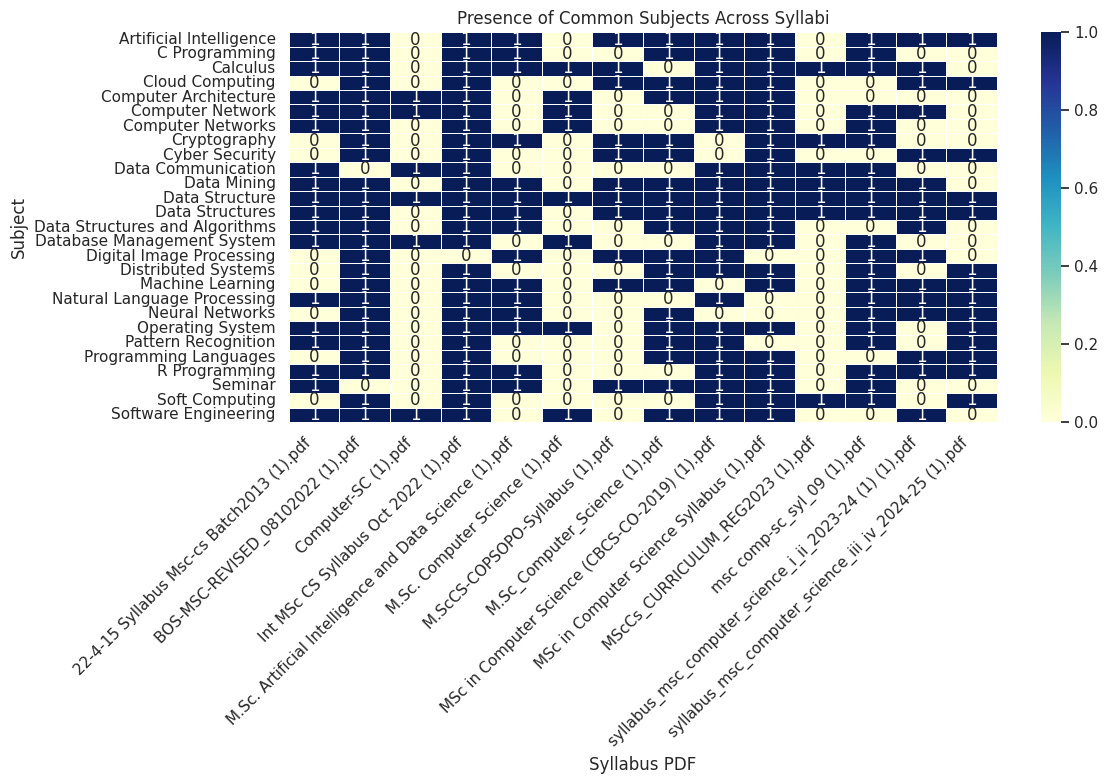

In [ ]:
# 📌 Visualization 1: Heatmap showing presence of common subjects across syllabi
plt.figure(figsize=(12, 8))
subject_presence = df_compiled.pivot_table(index='Subject',
                                         columns='Source PDF',
                                         aggfunc='size',
                                         fill_value=0)

sns.heatmap(subject_presence, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5)
plt.title('Presence of Common Subjects Across Syllabi')
plt.xlabel('Syllabus PDF')
plt.ylabel('Subject')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

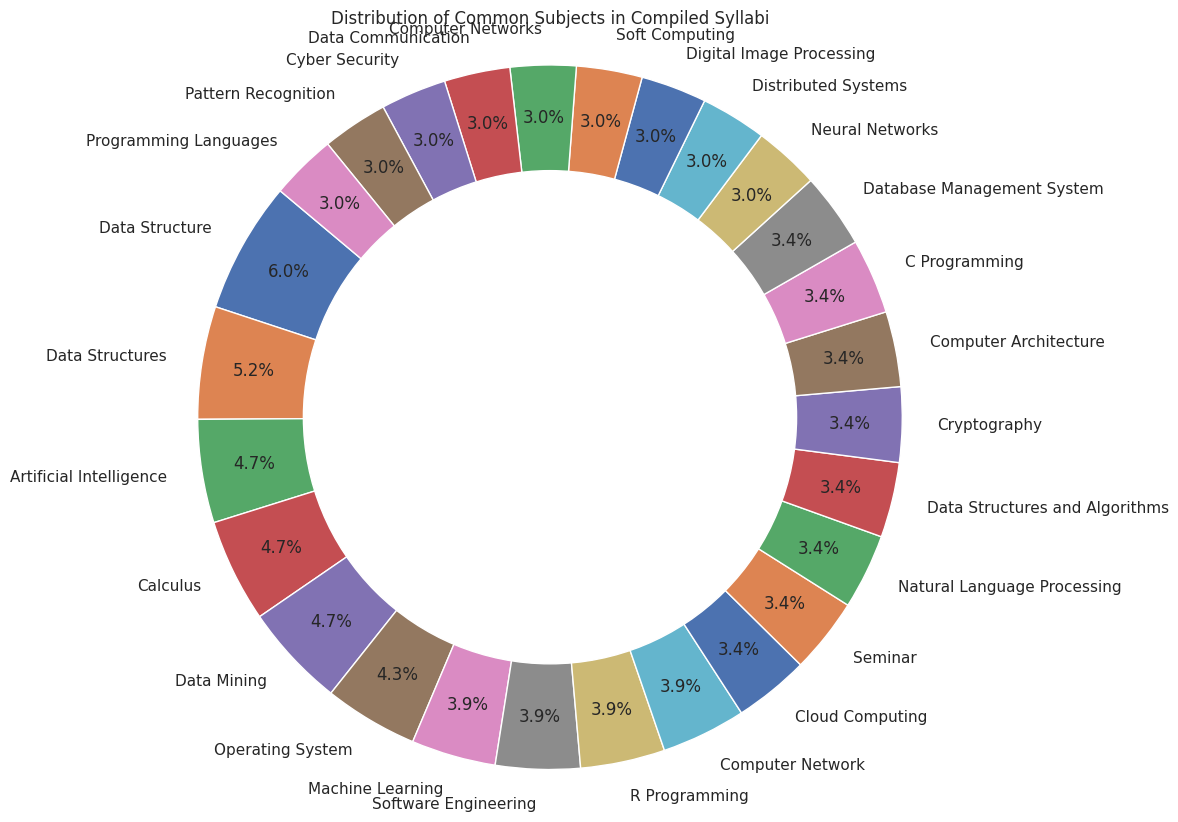

In [ ]:
# 📌 Visualization 2: Pie chart showing distribution of common subjects in compiled syllabi
subject_counts = df_compiled['Subject'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(subject_counts,
        labels=subject_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        pctdistance=0.85,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Distribution of Common Subjects in Compiled Syllabi')
plt.axis('equal')

# Draw a circle to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

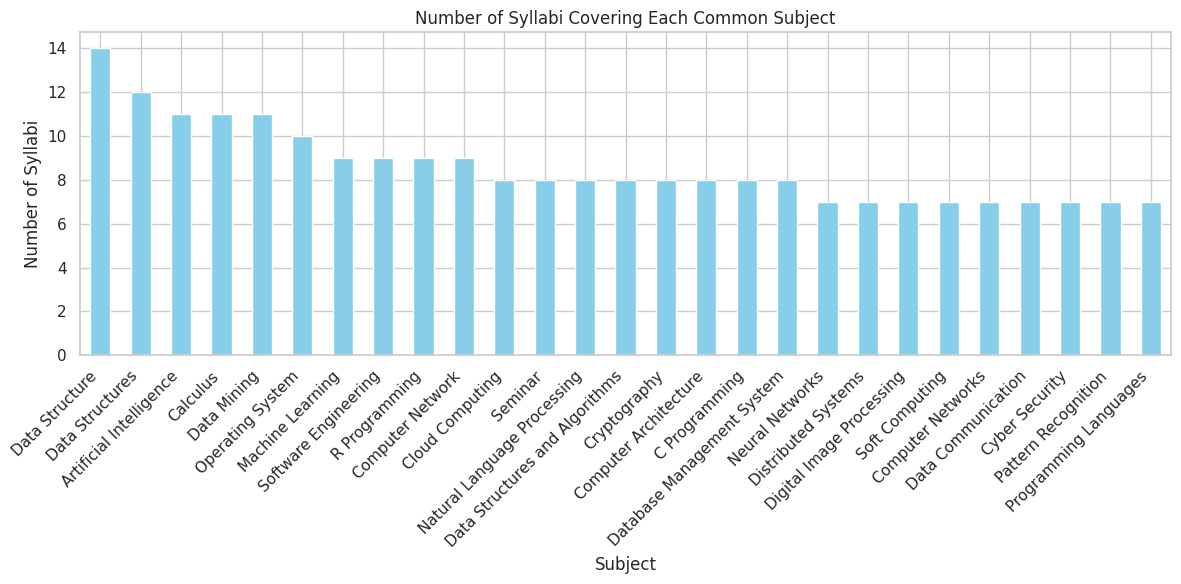

In [ ]:
# 📌 Visualization 3: Bar chart showing number of PDFs covering each common subject
plt.figure(figsize=(12, 6))
subject_counts.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Number of Syllabi Covering Each Common Subject')
plt.xlabel('Subject')
plt.ylabel('Number of Syllabi')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

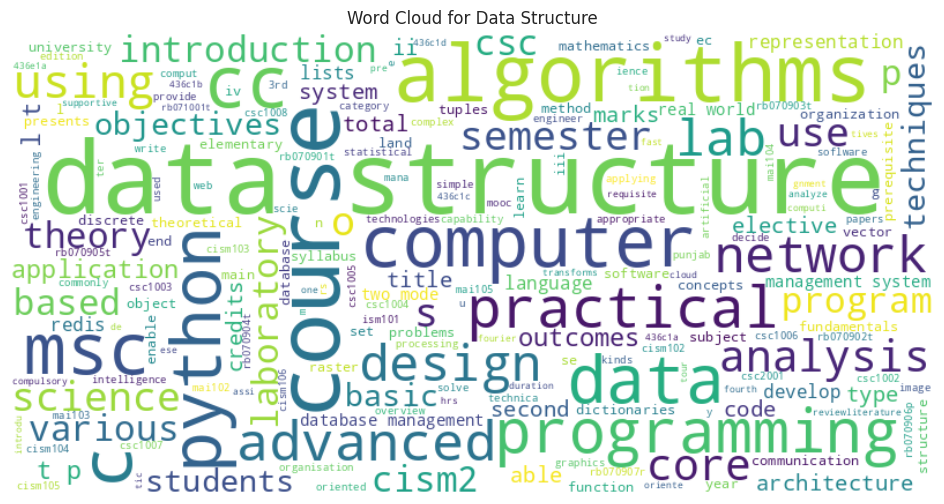

In [ ]:
# 📌 Visualization 4: Word cloud for most common subject
most_common_subject = subject_counts.idxmax()
subject_content = " ".join(df_compiled[df_compiled['Subject'] == most_common_subject]['Content Excerpt'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(subject_content)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Word Cloud for {most_common_subject}')
plt.axis('off')
plt.show()

<ipython-input-14-b32fe2dfc0fc>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Co-occurrence Count', y='Subject Pair',


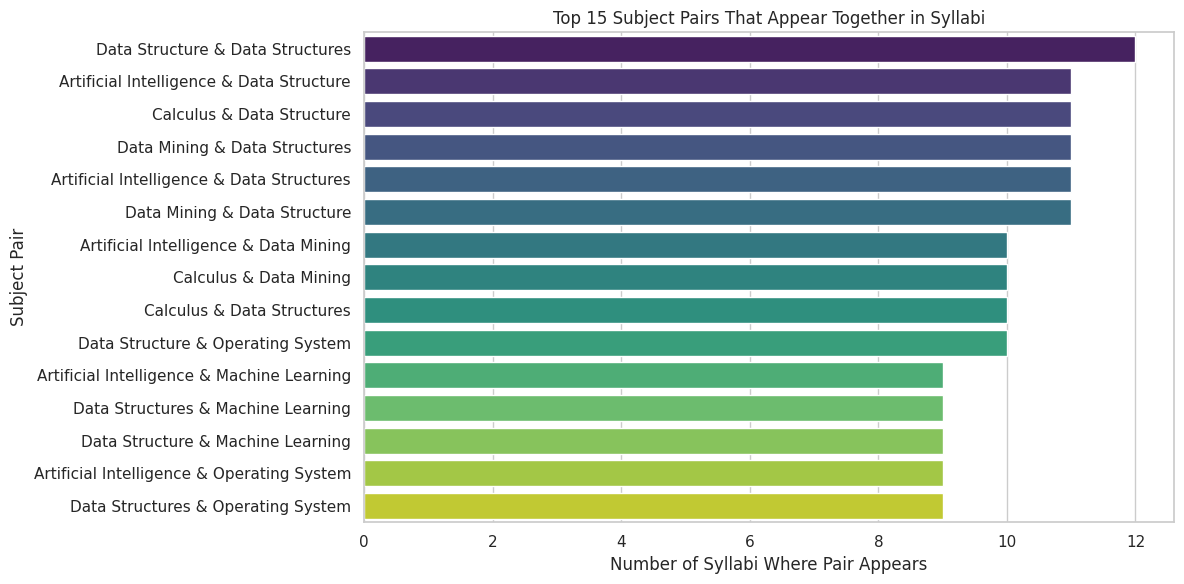

In [ ]:
# 📌 Visualization 5: Subject co-occurrence matrix (fixed version)
# Create a dictionary to track which subjects appear together in the same PDFs
subject_co_occurrence = defaultdict(int)
pdf_subjects = defaultdict(set)

for index, row in df_compiled.iterrows():
    pdf_subjects[row['Source PDF']].add(row['Subject'])

# Count co-occurrences
for pdf, subjects in pdf_subjects.items():
    subjects = list(subjects)
    for i in range(len(subjects)):
        for j in range(i+1, len(subjects)):
            pair = tuple(sorted([subjects[i], subjects[j]]))
            subject_co_occurrence[pair] += 1

# Create a DataFrame for the co-occurrence matrix
co_occurrence_df = pd.DataFrame(list(subject_co_occurrence.items()), columns=['Subject Pair', 'Co-occurrence Count'])
co_occurrence_df = co_occurrence_df.sort_values(by='Co-occurrence Count', ascending=False)

# Convert the tuple pairs to strings for better display
co_occurrence_df['Subject Pair'] = co_occurrence_df['Subject Pair'].apply(lambda x: " & ".join(x))

plt.figure(figsize=(12, 6))
sns.barplot(x='Co-occurrence Count', y='Subject Pair',
            data=co_occurrence_df.head(15),
            palette='viridis')
plt.title('Top 15 Subject Pairs That Appear Together in Syllabi')
plt.xlabel('Number of Syllabi Where Pair Appears')
plt.ylabel('Subject Pair')
plt.tight_layout()
plt.show()